Verified equation for $\xi_{as}$:

$\boxed{\xi_{as}= \frac{128\ln{(2)}^{3/2}n_{as}\kappa_{as}^2\kappa_Q^2\xi_1\xi_2\xi_3L^2}
{3\pi^{7/2}n_1 n_2 n_3 \epsilon_0^2 c^2 w_0^4 \tau_p^3}\int_{-\infty}^{\infty}e^{-\frac{4\ln{(2)} (t'-t_d)^2}{\tau_p^2}}\left|
\int_{-t_0}^{\infty}H(t'-\theta)e^{-\frac{(t'-\theta)}{T_2} - i\Delta\omega\theta}e^{-\frac{4\ln{(2)}\theta^2}{\tau_p^2}}\,d\theta\right|^2 dt'}$

Then in derivation its given that:

$$\Psi(t_d)=\int_{-\infty}^{\infty}\left[g(t'-t_d)\int_{-t_0}^{\infty}H(t'-\theta)\,e^{-\frac{(t'-\theta)}{T_2} - i\Delta\omega\theta}\,g^2(\theta)\,d\theta\right] dt'$$

and thus $\xi_{as}$ is

$$\xi_{as}=\frac{128\ln{(2)}^{3/2}n_{as}\kappa_{as}^2\kappa_Q^2\xi_1\xi_2\xi_3L^2}
{3\pi^{7/2}n_1 n_2 n_3 \epsilon_0^2 c^2 w_0^4 \tau_p^3}|\Psi(t_d)|^2$$

This assumes that
$$|\Psi(t_d)|^2=\int_{-\infty}^{\infty}e^{-\frac{4\ln{(2)} (t'-t_d)^2}{\tau_p^2}}\left|
\int_{-t_0}^{\infty}H(t'-\theta)e^{-\frac{(t'-\theta)}{T_2} - i\Delta\omega\theta}e^{-\frac{4\ln{(2)}\theta^2}{\tau_p^2}}\,d\theta\right|^2 dt'$$

Lets verify this and correct is as using a normalization facrtor: $\left[\frac{2\ln{(2)}}{\pi\tau^2}\right]^{1/4}$

$$\Psi(t_d)=\left[\frac{2\ln{(2)}}{\pi\tau^2}\right]^{1/4}\int_{-\infty}^{\infty}\left[g(t'-t_d)\int_{-t_0}^{\infty}H(t'-\theta)\,e^{-\frac{(t'-\theta)}{T_2} - i\Delta\omega\theta}\,g^2(\theta)\,d\theta\right] dt'$$

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def RHS(td, tau, T2, delom, tp_arr):
    #tp_arr = np.arange(-5000e-15, 10000e-15, 20e-15)
    the_arr = np.arange(-5*tau, 5*tau, 20e-15)
    I_Q = [np.trapezoid( np.heaviside(tp-the_arr,1)*np.exp(-(tp-the_arr)/T2-1j*delom*the_arr)*np.exp(-4*np.log(2)*the_arr**2/tau**2),the_arr) for tp in tp_arr]
    return np.trapezoid(np.exp(-4*np.log(2)*(tp_arr-td)**2/tau**2)*np.abs(I_Q)**2,tp_arr)

def LHS(td, tau, T2, delom, tp_arr, corr):
    #tp_arr = np.arange(-5000e-15, 10000e-15, 20e-15)
    the_arr = np.arange(-5*tau, 5*tau, 20e-15)
    I_Q = [np.trapezoid( np.heaviside(tp-the_arr,1)*np.exp(-(tp-the_arr)/T2-1j*delom*the_arr)*np.exp(-4*np.log(2)*the_arr**2/tau**2),the_arr) for tp in tp_arr]
    return np.abs(corr*np.trapezoid(np.exp(-2*np.log(2)*(tp_arr-td)**2/tau**2)*I_Q,tp_arr))**2

In [73]:
#amplitude


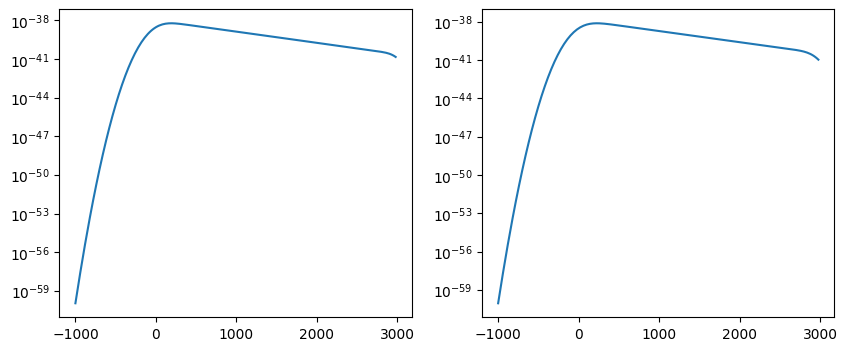

In [ ]:
tau, T2, delom = 200e-15, 1000e-15, 0
td_arr = np.arange(-1000e-15, 3000e-15, 20e-15)

norm_factor = (2*np.log(2)/np.pi/tau**2)**(1/4)

#RHS
S_act_arr = np.array([RHS(td, tau, T2, delom, td_arr) for td in td_arr])
#RHS
S_phi_arr = np.array([LHS(td, tau, T2, delom, td_arr, norm_factor) for td in td_arr])

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(td_arr*1e15, S_act_arr)
ax[0].set_yscale('log')
ax[1].plot(td_arr*1e15, S_phi_arr)
ax[1].set_yscale('log')

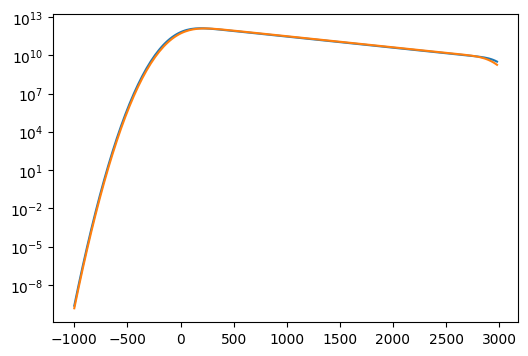

In [75]:
#when both are area normalized
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(td_arr*1e15, S_act_arr/np.trapezoid(S_act_arr,td_arr))
ax.plot(td_arr*1e15, S_phi_arr/np.trapezoid(S_phi_arr,td_arr))
ax.set_yscale('log')

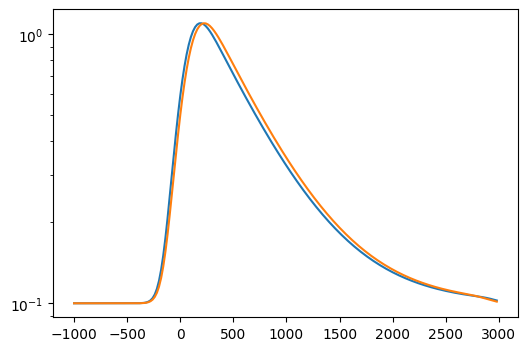

In [76]:
#when both are amplitude normalized
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(td_arr*1e15, (S_act_arr-np.min(S_act_arr))/(np.max(S_act_arr)-np.min(S_act_arr))+0.1)
ax.plot(td_arr*1e15, (S_phi_arr-np.min(S_phi_arr))/(np.max(S_phi_arr)-np.min(S_phi_arr))+0.1)
ax.set_yscale('log')

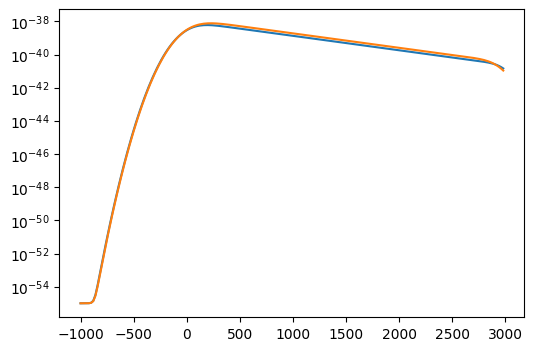

In [77]:
#when both are brought to same floor
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(td_arr*1e15, (S_act_arr-np.min(S_act_arr))+1e-55)
ax.plot(td_arr*1e15, (S_phi_arr-np.min(S_phi_arr))+1e-55)
ax.set_yscale('log')